<h1>Using Binance library for python to get the historical price on BTC and plot the RSI indicator</h1>

In [1]:
import os
import pandas as pd
import btalib
from binance.client import Client
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

<h5>Initializing variables for Binance API</h5>

In [2]:
api_key = os.environ.get('binance_test_api_key')
api_secret = os.environ.get('binance_test_api_secret')
client = Client(api_key, api_secret)
client.API_URL = 'https://testnet.binance.vision/api'

<h5>Get timestamp of earliest date data is available. </h5>
<h6>Valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M</h6>

In [3]:
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')

<h5>Request historical klines data (candle) for BTCUSDT</h5>

In [4]:
bars = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

<h5>Remove the columns that I don't need and save to a csv file</h5>

In [5]:
for line in bars:
    del line[5:]
    
df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close'])
df.set_index('date', inplace=True)
df.to_csv('btc_usdt.csv')

<h5>Load the csv into a dataframe (this is just for a demo purpouse)</h5>

In [6]:
btc_df = pd.read_csv('btc_usdt.csv', index_col=0)
btc_df.index = pd.to_datetime(btc_df.index, unit='ms')

<h5>Calculate 20 simple moving average with Pandas also do the same with btalib</h5>

In [7]:
btc_df['20sma'] = btc_df.close.rolling(20).mean()
sma = btalib.sma(btc_df.close)
btc_df['sma'] = btalib.sma(btc_df.close, period=20).df

<h5>Use btalib to calculate RSI</h5>

In [8]:
btc_df['rsi'] = btalib.rsi(btc_df.close).df

<h5>Calculate RSI with Pandas and some calculations</h5>

In [9]:
delta_close = btc_df.close.diff(1)
delta_close.dropna(inplace=True)
positive_values = delta_close.copy()
positive_values[positive_values < 0] = 0
negative_values = delta_close.copy()
negative_values[negative_values > 0] = 0

days = 14
average_gain = positive_values.rolling(window=days).mean()
average_loss = abs(negative_values.rolling(window=days).mean())

relative_strenge = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strenge))

<h5>Create a new dataframe with the close and RSI values</h5>

In [10]:
combined_df = pd.DataFrame()
combined_df['close'] = btc_df['close']
combined_df['RSI'] = btc_df['rsi']

<h5>Create two plots to show these values</h5>

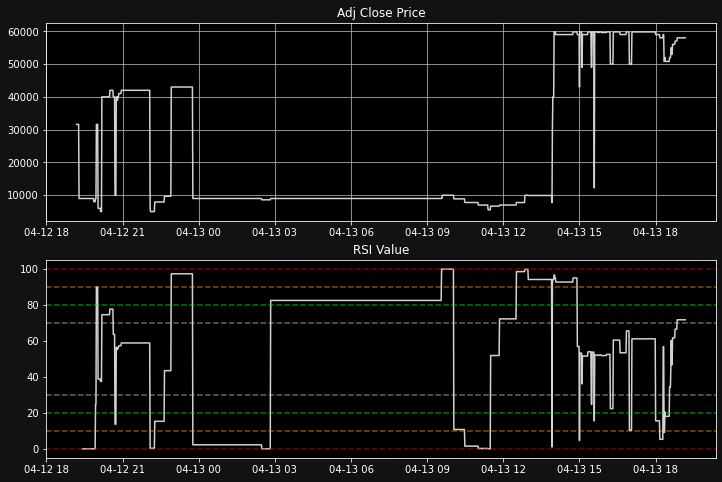

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined_df.index, combined_df['close'], color = 'lightgray')
ax1.set_title("Adj Close Price", color = 'white')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis = 'x', colors = 'white')
ax1.tick_params(axis = 'y', colors = 'white')

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(combined_df.index, combined_df['RSI'], color = 'lightgray')
ax2.set_title("RSI Value", color = 'white')
ax2.grid(False)
ax2.axhline(0, linestyle = '--', alpha = 0.5, color = '#ff0000')
ax2.axhline(10, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(20, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(30, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(70, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(80, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(90, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(100, linestyle = '--', alpha = 0.5, color = '#ff0000')
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.figure.set_facecolor('#121212')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.xaxis.label.set_color('white')
ax2.yaxis.label.set_color('white')
ax2.tick_params(axis = 'x', colors = 'white')
ax2.tick_params(axis = 'y', colors = 'white')

plt.show()